# Preprocessing Phase 
**Preprocessing Module** 
* With a given raw dataset, we first preprocess the data before feeding to a neural network for training phase 
* In this phase, we drop columns with NA data points and normalize the numeric data points 
* We convert the non-numeric data points to one-hot encoding format

We are using KDD-99 dataset in order to train a neural network for anomaly detection. [KDD-99](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) dataset is a very famous dataset for intrusion detection systems. The following code is for preprocessing of raw data from the KDD-99 dataset. 

**Downloading KDD-99 dataset**

In [10]:
import pandas as pd
from tensorflow.keras.utils import get_file

try:
    path = get_file('kddcup.data_10_percent.gz', origin=
    'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading')
    raise
    
print(path) 

df = pd.read_csv(path, header=None)

print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1) #Dropping columns with NA values 

/Users/vijay/.keras/datasets/kddcup.data_10_percent.gz
Read 494021 rows.


In [11]:
old_features = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

Adding columns to the dataframe 

In [12]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)
# display 5 rows
display(df[0:5])

,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,tcp,...,0.0,normal.
1,0,tcp,...,0.0,normal.
2,0,tcp,...,0.0,normal.
3,0,tcp,...,0.0,normal.
4,0,tcp,...,0.0,normal.


Normalizing the numeric data-points and converting the non-numeric datapoints to one-hot encoding 

In [13]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt 

def normalize(df, name, mean=None, sd=None):
    if mean is None: 
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    df[name] = (df[name] - mean)/sd
    
def encode_text_dummy(df, name):
    #one-hot encoding  
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [14]:
normalize(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
normalize(df, 'src_bytes')
normalize(df, 'dst_bytes')
encode_text_dummy(df, 'land')
normalize(df, 'wrong_fragment')
normalize(df, 'urgent')
normalize(df, 'hot')
normalize(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
normalize(df, 'num_compromised')
normalize(df, 'root_shell')
normalize(df, 'su_attempted')
normalize(df, 'num_root')
normalize(df, 'num_file_creations')
normalize(df, 'num_shells')
normalize(df, 'num_access_files')
normalize(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
normalize(df, 'count')
normalize(df, 'srv_count')
normalize(df, 'serror_rate')
normalize(df, 'srv_serror_rate')
normalize(df, 'rerror_rate')
normalize(df, 'srv_rerror_rate')
normalize(df, 'same_srv_rate')
normalize(df, 'diff_srv_rate')
normalize(df, 'srv_diff_host_rate')
normalize(df, 'dst_host_count')
normalize(df, 'dst_host_srv_count')
normalize(df, 'dst_host_same_srv_rate')
normalize(df, 'dst_host_diff_srv_rate')
normalize(df, 'dst_host_same_src_port_rate')
normalize(df, 'dst_host_srv_diff_host_rate')
normalize(df, 'dst_host_serror_rate')
normalize(df, 'dst_host_srv_serror_rate')
normalize(df, 'dst_host_rerror_rate')
normalize(df, 'dst_host_srv_rerror_rate')

df.dropna(inplace=True,axis=1) #dropping the columns with any NA 
df[0:5]

,duration,src_bytes,...,is_guest_login-0,is_guest_login-1
0,-0.067792,-0.002879,...,1,0
1,-0.067792,-0.002820,...,1,0
2,-0.067792,-0.002824,...,1,0
3,-0.067792,-0.002840,...,1,0
4,-0.067792,-0.002842,...,1,0


Seperating the columns with **outcome** and features 
x will hold the feature columns while y will hold the **outcome**.  
Since, outcomes has a set of attack types, 23 types, we convert the **outcome** column to a one-hot encoding vector  

In [15]:
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome'])
outcomes = dummies.columns 
num_classes = len(outcomes)
y = dummies.values 

In [16]:
df.groupby('outcome')['outcome'].count()
m = dummies.sum()
#Try to draw a bar plot to show normal and attack data

# Training Phase 
**Training Module**
* In this part, we build a neural network using keras API 

In [17]:
import pandas as pd
import io 
import requests 
import numpy as np 
import os 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=x.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(y.shape[1], activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
monitor = EarlyStopping(monitor="val_loss", min_delta=1e-3, patience=5, verbose=2, mode="auto", restore_best_weights=True)

filepath = "model.h5"
cp1= ModelCheckpoint(filepath=filepath, monitor='loss', save_best_only=True, verbose=1, mode='min')
callbacks_list = [cp1]

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                7744      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 23)                391       
Total params: 10,743
Trainable params: 10,743
Non-trainable params: 0
_________________________________________________________________


Once we build the model, we feed the model with training data points

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=3, batch_size=50)

Epoch 1/3
7411/7411 - 17s - loss: 0.0302 - accuracy: 0.9953 - val_loss: 0.0063 - val_accuracy: 0.9982
Epoch 2/3
7411/7411 - 15s - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0176 - val_accuracy: 0.9983
Epoch 3/3
7411/7411 - 15s - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9991


Here we save the model along with its weights 

In [20]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


**Testing the model** 

In [21]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

Validation score: 0.9991012582384662


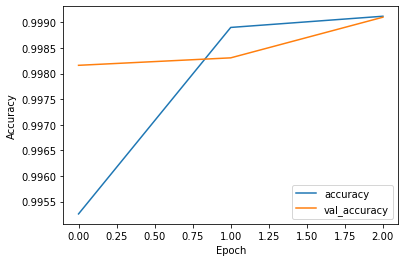

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Predicting with a Trained Model

In [23]:
#Write a module to predict anomaly in a packet and classify it accordingly 
import random 

attacks_types = { 
    'normal.': 'normal', 
'back.': 'dos', 
'buffer_overflow.': 'u2r', 
'ftp_write.': 'r2l', 
'guess_passwd.': 'r2l', 
'imap.': 'r2l', 
'ipsweep.': 'probe', 
'land.': 'dos', 
'loadmodule.': 'u2r', 
'multihop.': 'r2l', 
'neptune.': 'dos', 
'nmap.': 'probe', 
'perl.': 'u2r', 
'phf.': 'r2l', 
'pod.': 'dos', 
'portsweep.': 'probe', 
'rootkit.': 'u2r', 
'satan.': 'probe', 
'smurf.': 'dos', 
'spy.': 'r2l', 
'teardrop.': 'dos', 
'warezclient.': 'r2l', 
'warezmaster.': 'r2l', 
} 

attack_index = {
    0: 'back.',
    1: 'buffer_overflow.',
    2: 'ftp_write.',
    3: 'guess_passwd.',
    4: 'imap.',
    5: 'ipsweep.',
    6: 'land.',
    7: 'loadmodule.',
    8: 'multihop.',
    9: 'neptune.',
    10: 'nmap.',
    11: 'normal.',
    12: 'perl.',
    13: 'phf.',
    14: 'pod.',
    15: 'portsweep.',
    16: 'rootkit.',
    17: 'satan.',
    18: 'smurf.',
    19: 'spy.',
    20: 'teardrop.',
    21: 'warezclient.',
    22: 'warezmaster.'
}
def predict(data_point):
    #binary classification as either "good" or "bad" connection 
    val = data_point.reshape(1, 120)
    prediction = model.predict(val)
    pred = np.argmax(prediction, axis=1)
    attack = attack_index[pred[0]]
    attack_type = attacks_types[attack]
#     print(attack_type)
    if attack_type == 'normal':
        return 0 
    else: 
        return 1 

for i in range(10):
    sample = random.randint(1, 123506)
    data_point = x_test[sample]
    if predict(data_point) == 0:
        print("good connection")
    else: 
        print("Anomaly Detected")

Anomaly Detected
Anomaly Detected
Anomaly Detected
Anomaly Detected
Anomaly Detected
good connection
Anomaly Detected
Anomaly Detected
Anomaly Detected
Anomaly Detected


# Re-Training the Model
* We re-train the same model with a new batch of dataset

In [24]:
from tensorflow.keras.models import load_model
new_model = load_model("my_model")
score = model.evaluate(x_train, y_train, batch_size=50)

cp1 = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
cp1.best = score # <== ****THIS IS THE KEY **** See source for  ModelCheckpoint

# fit the model
callbacks_list = [cp1]
history = new_model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=5, batch_size=50)

7411/7411 [==============================] - 11s 1ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 1/5
7411/7411 - 13s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 2/5
7411/7411 - 17s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 3/5
7411/7411 - 10s - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 4/5
7411/7411 - 10s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 5/5
7411/7411 - 9s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993


In [25]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


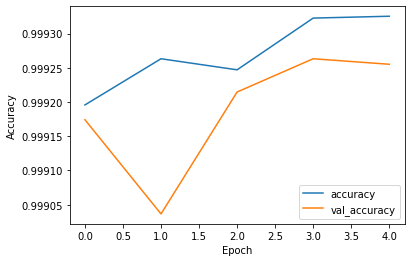

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Comparsion between Old and New Model

**What happens when a new batch of data set comes with a new feature column?**
* First we will drop the new feature and retrain the model model to see how the existing model perform 
* Then we retrain the model with new feature on a completely new model and compare the performance of old model trained in the same number of random sampled data points 

**Module for Preprocessing the New Dataset** 

In [27]:
def preprocessing_dataset(path):
    df = pd.read_csv(path, header=None)

    print("Read {} rows.".format(len(df)))
    df.dropna(inplace=True,axis=1) #Dropping columns with NA values 
    return df 

**Module to extract new features**

In [28]:
def extract_new_feature(df):
    all_features = df.columns.to_list()
    new_features = set(all_features) - set(old_features)
    return list(new_features)

**Module to get the data in the older format** 

In [29]:
def dropping_new_features(df, new_features):
    for feature in new_features: 
        df.drop(feature, axis=1, inplace=True)
    return df 

**Normalizing the columns and encoding text field to dummy**

In [30]:
def normalizing_and_creating_one_hot_encoding(df):
    normalize(df, 'duration')
    encode_text_dummy(df, 'protocol_type')
    encode_text_dummy(df, 'service')
    encode_text_dummy(df, 'flag')
    normalize(df, 'src_bytes')
    normalize(df, 'dst_bytes')
    encode_text_dummy(df, 'land')
    normalize(df, 'wrong_fragment')
    normalize(df, 'urgent')
    normalize(df, 'hot')
    normalize(df, 'num_failed_logins')
    encode_text_dummy(df, 'logged_in')
    normalize(df, 'num_compromised')
    normalize(df, 'root_shell')
    normalize(df, 'su_attempted')
    normalize(df, 'num_root')
    normalize(df, 'num_file_creations')
    normalize(df, 'num_shells')
    normalize(df, 'num_access_files')
    normalize(df, 'num_outbound_cmds')
    encode_text_dummy(df, 'is_host_login')
    encode_text_dummy(df, 'is_guest_login')
    normalize(df, 'count')
    normalize(df, 'srv_count')
    normalize(df, 'serror_rate')
    normalize(df, 'srv_serror_rate')
    normalize(df, 'rerror_rate')
    normalize(df, 'srv_rerror_rate')
    normalize(df, 'same_srv_rate')
    normalize(df, 'diff_srv_rate')
    normalize(df, 'srv_diff_host_rate')
    normalize(df, 'dst_host_count')
    normalize(df, 'dst_host_srv_count')
    normalize(df, 'dst_host_same_srv_rate')
    normalize(df, 'dst_host_diff_srv_rate')
    normalize(df, 'dst_host_same_src_port_rate')
    normalize(df, 'dst_host_srv_diff_host_rate')
    normalize(df, 'dst_host_serror_rate')
    normalize(df, 'dst_host_srv_serror_rate')
    normalize(df, 'dst_host_rerror_rate')
    normalize(df, 'dst_host_srv_rerror_rate')

    df.dropna(inplace=True,axis=1) #dropping the columns with any NA 
    df[0:5]
    return df 

**Splitting the data into train and test datasets**

In [31]:
def getting_train_test_dataset(df):
    x_columns = df.columns.drop('outcome')
    x = df[x_columns].values
    dummies = pd.get_dummies(df['outcome'])
    outcomes = dummies.columns 
    num_classes = len(outcomes)
    y = dummies.values 
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    return (x_train, x_test, y_train, y_test)

**Training a Neural network with the data in older format**

In [32]:
#Here we adjust the input_dim with new x.shape[1] size if the dataset involves a new set of features 

# the value of x.shape[1] will be different in the initial layer in this case
def build_model(df):
    x_train, x_test, y_train, y_test = getting_train_test_dataset(df)
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(y.shape[1], activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    monitor = EarlyStopping(monitor="val_loss", min_delta=1e-3, patience=5, verbose=2, mode="auto", restore_best_weights=True)
    return model 

In [33]:
def train_and_test_model(df): 
    x_train, x_test, y_train, y_test = getting_train_test_dataset(df)
    model = build_model()
    filepath = "model.h5"
    cp1= ModelCheckpoint(filepath=filepath, monitor='loss', save_best_only=True, verbose=1, mode='min')
    callbacks_list = [cp1]
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=3, batch_size=50)
    model.save('my_model')
    
    pred = model.predict(x_test)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    print("Validation score: {}".format(score))
    
    return score

In [34]:
def getting_performance_of_new_dataset(path, mode):
    df = preprocessing_dataset(path)
    new_features = extract_new_feature(df)
    if mode == "old_format": 
        df = dropping_new_features(df, new_feature)
        df = normalizing_and_creating_one_hot_encoding(df)
        model = build_model()
        score_old_format = train_and_test_model(df)
    else: 
        df = normalizing_and_creating_one_hot_encoding(df)
        model = build_model()
        score_new_format = train_and_test_model(df)
    if score_old_format > score_new_format:
        Print("Stay with the older format")
    else:
        Print("Introduce new features to the training datasets")